# Data Collection and Pre-Processing
*Here I use the data from https://www.cryptodatadownload.com/ to create a train and test set for my models

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [394]:
ethData = pd.read_csv('Coinbase_ETHUSD_d.csv', header = 1)

In [395]:
ethData.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-08-08,ETHUSD,379.75,383.11,376.18,380.52,22964.92,8713003.27
1,2020-08-07,ETHUSD,395.28,398.57,362.88,379.75,258109.56,98788837.44
2,2020-08-06,ETHUSD,401.21,404.03,391.00,395.28,147321.26,58496862.22
3,2020-08-05,ETHUSD,389.82,408.00,383.86,401.21,208372.76,82610803.46
4,2020-08-04,ETHUSD,386.22,403.64,380.67,389.82,250984.93,98150581.76


In [396]:
ethData.shape[0]

1523

In [397]:
ethData.corr()

,Open,High,Low,Close,Volume ETH,Volume USD
Open,1.000000,0.998246,0.994306,0.995971,0.156844,0.681699
High,0.998246,1.000000,0.994007,0.998262,0.176951,0.700807
Low,0.994306,0.994007,1.000000,0.996331,0.117684,0.631969
Close,0.995971,0.998262,0.996331,1.000000,0.155605,0.676920
Volume ETH,0.156844,0.176951,0.117684,0.155605,1.000000,0.627961
Volume USD,0.681699,0.700807,0.631969,0.676920,0.627961,1.000000


In [398]:
ethData['Close'] = ethData['Close'].replace(0, method='ffill')
ethPrices = ethData['Close'].to_numpy()

In [399]:
ethPrices[:10]

array([380.52, 379.75, 395.28, 401.21, 389.82, 386.22, 372.21, 387.4 ,
       346.86, 335.31])

(array([], dtype=int64),)


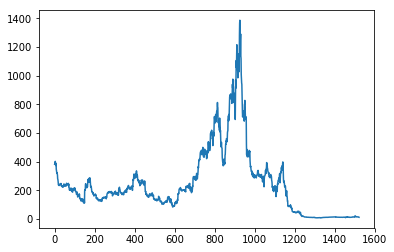

In [400]:
print(np.where(ethPrices == 0))
plt.plot(ethPrices)

In [401]:
def percent_change(arr):
    array = np.copy(arr)
    p0 = array[0]
    for i in range(len(array)):
        p = array[i]
        if p0==p:
            array[i]=0
            continue
        elif p0==0:
            array[i]=1
            p0=p
            continue
        array[i] = 100 * (p - p0)/p0
        p0 = p
    return array

In [402]:
eth_pct = percent_change(ethPrices)

Text(0.5, 1.0, 'Price fluctuation for Ethereum')

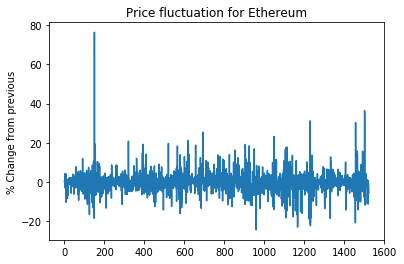

In [403]:
plt.plot(eth_pct)
plt.ylabel('% Change from previous')
plt.title('Price fluctuation for Ethereum')

In [404]:
print(eth_pct[1003])

-2.7259542487968824


In [405]:
print(np.max(eth_pct))

76.43699002719856


In [406]:
print(np.where(eth_pct > 50))#as expected we have no massive fluctuations above 25% 

(array([150]),)


In [407]:
print(np.where(ethPrices == 0)) 

(array([], dtype=int64),)


Text(0.5, 1.0, 'Price fluctuation for Ethereum')

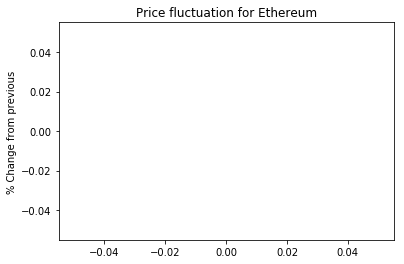

In [408]:
plt.plot(eth_pct[10000:15000])
plt.ylabel('% Change from previous')
plt.title('Price fluctuation for Ethereum')

In [409]:
large_fs = np.where(np.abs(eth_pct)>15)
large_fs

(array([ 125,  149,  150,  154,  320,  392,  520,  565,  578,  617,  656,
         692,  852,  904,  905,  924,  949,  959, 1048, 1105, 1106, 1107,
        1109, 1114, 1144, 1164, 1166, 1181, 1188, 1222, 1227, 1228, 1230,
        1231, 1233, 1329, 1455, 1456, 1463, 1491, 1501, 1502]),)

In [410]:
#ethData.iloc[3492-1:3510+1][['Close', '%Change']]

In [411]:
s = pd.Series(eth_pct, name = '%Change')
s

0        0.000000
1       -0.202355
2        4.089533
3        1.500202
4       -2.838912
          ...    
1518     0.502513
1519   -11.357143
1520    -0.564061
1521    -3.322528
1522    -5.699916
Name: %Change, Length: 1523, dtype: float64

In [412]:
ethData['%Change'] = s
ethData.head()

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,%Change
0,2020-08-08,ETHUSD,379.75,383.11,376.18,380.52,22964.92,8713003.27,0.000000
1,2020-08-07,ETHUSD,395.28,398.57,362.88,379.75,258109.56,98788837.44,-0.202355
2,2020-08-06,ETHUSD,401.21,404.03,391.00,395.28,147321.26,58496862.22,4.089533
3,2020-08-05,ETHUSD,389.82,408.00,383.86,401.21,208372.76,82610803.46,1.500202
4,2020-08-04,ETHUSD,386.22,403.64,380.67,389.82,250984.93,98150581.76,-2.838912


In [413]:
grad = []
for change in ethData['%Change']:
    if change < 0:
        grad.append(0)
    else:
        grad.append(1)
print(grad[:10])
ethData['Gradient'] = pd.Series(grad, name = 'Gradient')
ethData.head()

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0]


,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,%Change,Gradient
0,2020-08-08,ETHUSD,379.75,383.11,376.18,380.52,22964.92,8713003.27,0.000000,1
1,2020-08-07,ETHUSD,395.28,398.57,362.88,379.75,258109.56,98788837.44,-0.202355,0
2,2020-08-06,ETHUSD,401.21,404.03,391.00,395.28,147321.26,58496862.22,4.089533,1
3,2020-08-05,ETHUSD,389.82,408.00,383.86,401.21,208372.76,82610803.46,1.500202,1
4,2020-08-04,ETHUSD,386.22,403.64,380.67,389.82,250984.93,98150581.76,-2.838912,0


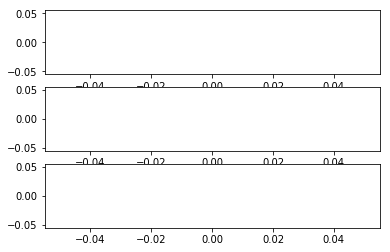

In [414]:
plt.subplot(311)
plt.plot(ethData['Open'][3450:3500])
plt.subplot(312)
plt.plot(ethData['%Change'][3450:3500])
plt.subplot(313)
plt.plot(ethData['Gradient'][3450:3500])
plt.show()

## Batch and Split the data into sets

We'll want to create a sequence of % changes with a given sequence_length variable and a gradient target classifier.

In [415]:
def create_targets(dataset, sequence_length):
    mLData = []
    for i in range(sequence_length, dataset.shape[0]):
        mLData.append([dataset['%Change'][i-sequence_length:i].to_numpy(),dataset['Gradient'][i]])
    return mLData

#create the data into sequences with the correct targets
seq_len=7
input_data = create_targets(ethData,seq_len)

input_data[0]

[array([ 0.        , -0.20235467,  4.08953259,  1.50020239, -2.83891229,
        -0.92350316, -3.62746621]), 1]

In [416]:
#Randomize the list
import random
random.shuffle(input_data)

In [417]:
n=len(input_data)
train=int(0.7*n)
valid=int(0.2*n)
test=int(0.1*n)
train_data=input_data[:train]
valid_data=input_data[train:train+valid]
test_data=input_data[-test:]


In [418]:
print(len(input_data))
for i in range(3):
    print(input_data[i])

1516
[array([ 1.60646545,  1.80832413,  0.88650786,  5.68637987,  0.75666946,
        0.43931254, -0.7329255 ]), 0]
[array([ 0.8811312 , -0.41176226,  1.40745072, -1.49911453,  0.84876866,
        0.33167496,  2.12396694]), 0]
[array([ 3.93187172,  1.24215481,  0.92556718,  3.70243986,  0.04524515,
       -6.33967849,  0.43896229]), 0]


In [419]:
ethData.head(7)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,%Change,Gradient
0,2020-08-08,ETHUSD,379.75,383.11,376.18,380.52,22964.92,8.713003e+06,0.000000,1
1,2020-08-07,ETHUSD,395.28,398.57,362.88,379.75,258109.56,9.878884e+07,-0.202355,0
2,2020-08-06,ETHUSD,401.21,404.03,391.00,395.28,147321.26,5.849686e+07,4.089533,1
3,2020-08-05,ETHUSD,389.82,408.00,383.86,401.21,208372.76,8.261080e+07,1.500202,1
4,2020-08-04,ETHUSD,386.22,403.64,380.67,389.82,250984.93,9.815058e+07,-2.838912,0
5,2020-08-03,ETHUSD,372.21,399.69,366.34,386.22,246594.39,9.579646e+07,-0.923503,0
6,2020-08-02,ETHUSD,387.40,415.00,325.75,372.21,573196.45,2.166140e+08,-3.627466,0


The data looks like it checks out, and correct next gradient given a previous sequence of 5

## Attempting pattern recognition with a very simple model

Next we can try to predict the gradient with a fully connected neural network. This will likely be innacurate but is a good litmus test for how our data behaves 

In [420]:
from torch import nn
import torch

In [421]:
#TODO: fix error when specifying larger batch size than 1

trainLoader = torch.utils.data.DataLoader(train_data,batch_size = 1, shuffle=True)

In [422]:

net = nn.Sequential(nn.Linear(seq_len,16),
                 nn.ReLU(),
                 nn.Linear(16,32),
                 nn.ReLU(),
                 nn.Linear(32,2),
                 )
net

Sequential(
  (0): Linear(in_features=7, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=2, bias=True)
)

Lets attempt to run some of our data through the network and see what happens

In [423]:
test_seq = torch.from_numpy(input_data[0][0]).float()
test_seq
output = torch.argmax(net(test_seq)).squeeze(0)
print(output)

tensor(1)


### Define the Accuracy Metric

In [424]:
def accuracy(inp,r=0.1):
    corr=0
    length = int(r*len(inp))
    for i in range(length):
        test_seq = torch.from_numpy(inp[i][0]).float()
        if inp[i][1] == torch.argmax(net(test_seq)).squeeze(0).item():
            corr += 1
    print(f'The model is {100*corr/length:0.2f}% accurate')

## Write the Training Loop

In [425]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)

In [426]:
epochs=10
c=1
b_size=32
net.train()
for e in range(epochs):
    loss=0
    batch=0
    optimizer.zero_grad()
    for features, targets in trainLoader:
        features=features.float()
        #targets = torch.tensor([0])
        out=net(features)
        loss+=criterion(out,targets)
        if batch==b_size:
            loss=loss/b_size
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if c%50 == 0 and type(loss) is not int:#for every 250 batches, print the training loss
                net.eval()
                #print(targets.item(), torch.argmax(out).item())
                print('running loss:',round(loss.item(),3))
                print('for the training set')
                accuracy(train_data, 0.1)
                print('for validation set')
                accuracy(valid_data)
                print()
                net.train()
            batch=0
            loss=0
            c+=1
        batch+=1
        
        


running loss: 0.712
for the training set
The model is 40.57% accurate
for validation set
The model is 40.00% accurate

running loss: 0.627
for the training set
The model is 48.11% accurate
for validation set
The model is 43.33% accurate

running loss: 0.641
for the training set
The model is 54.72% accurate
for validation set
The model is 60.00% accurate

running loss: 0.669
for the training set
The model is 52.83% accurate
for validation set
The model is 33.33% accurate

running loss: 0.722
for the training set
The model is 65.09% accurate
for validation set
The model is 43.33% accurate

running loss: 0.592
for the training set
The model is 54.72% accurate
for validation set
The model is 46.67% accurate



In [427]:
i=1
test_seq = torch.from_numpy(input_data[i][0]).float()
test_seq
output = torch.argmax(net(test_seq)).squeeze(0)
print(output, input_data[i][1])

tensor(0) 0


In [428]:
accuracy(test_data,1)

The model is 47.02% accurate


# Test the Model with Real Time Data

In [429]:
import cryptocompare as crc
import datetime

In [430]:
tod = datetime.datetime.now()
test=crc.get_historical_price('ETH', 'USD',
                         timestamp=tod, exchange='Coinbase')
print(test)

{'ETH': {'USD': 393.68}}


In [440]:
def get_past_days(num_days=5,curr='ETH'):
    tod = datetime.datetime.now()
    prices=[]
    for i in range(num_days+1,1,-1):
        d = datetime.timedelta(days = i)
        a = tod - d
        price=crc.get_historical_price(curr, 'USD',
                         timestamp=a, exchange='Coinbase')
        prices.append(price[curr]['USD'])
    return prices
p=get_past_days(8)
print(p)

[346.86, 387.4, 372.21, 386.22, 389.82, 401.21, 395.28, 379.75]


In [441]:
delta_real=percent_change(p)[1:]
delta_real

array([11.68771262, -3.92101187,  3.76400419,  0.93211123,  2.92186137,
       -1.47802896, -3.92886055])

In [442]:
prediction = torch.argmax(net(torch.from_numpy(delta_real).float())).squeeze(0).item()
prediction

0

In [443]:
real = int(get_past_days(1)[0] > crc.get_historical_price('ETH', 'USD',
                                                       timestamp=datetime.datetime.now(),
                                                       exchange='Coinbase')['ETH']['USD'])
real

0

In this case, our model correctly predicted that the price would increase. However, even a naive model would be right 50% of the time so this result is not surpising.

# RNN Based Model for Pattern Recognition
Now we can try a slightly more advanced model in the form of an recurrent neural network using lstm cells

In [ ]:
class rnn_model():
    def __init__():
        super